In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [10]:
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
X = iris_data.drop(columns=['Id', 'Species'])
y = iris_data['Species']

In [12]:
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

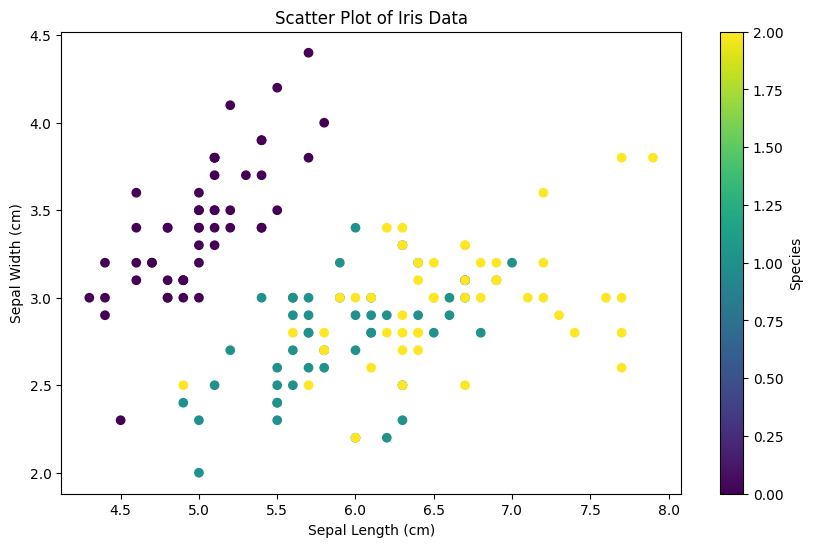

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data['SepalLengthCm'], iris_data['SepalWidthCm'], c=iris_data['Species'], cmap='viridis')
plt.title('Scatter Plot of Iris Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Species')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=56 )

In [16]:
svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svm_classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


Confusion Matrix:
[[5 0 0]
 [0 3 1]
 [0 0 6]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.75      0.86         4
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.93        15
      macro avg       0.95      0.92      0.93        15
   weighted avg       0.94      0.93      0.93        15



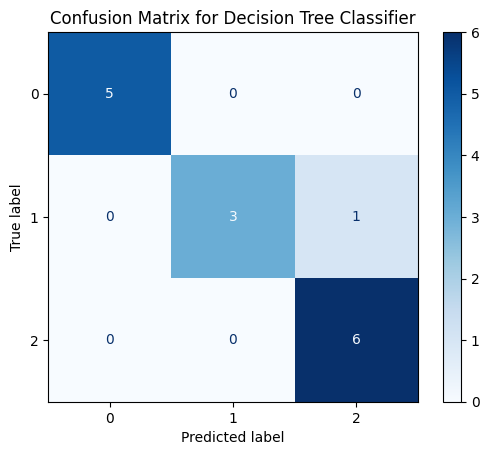

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris_data['Species'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()